In [1]:
%pylab inline
from scipy import linalg

Populating the interactive namespace from numpy and matplotlib


# Inertia tensor

$I_{i,j} = \sum_{x_n V} \dfrac{x_{n}^{(i)} x_{n}^{(j)}}{d_n^2}$


In [64]:
def RIT(x, y, z, q, s):
    N = len(x)
    XYZ = zeros([3,N])
    XYZ[0,:] = x
    XYZ[1,:] = y
    XYZ[2,:] = z
    I = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                d = np.sqrt(XYZ[0,n]**2 + XYZ[1,n]**2/q**2 + XYZ[2,n]**2/s**2)
                Xi = sum(XYZ[i,n])
                Xj = sum(XYZ[j,n])
                XX[n] = Xi * Xj / d**2
            I[i][j] = sum(XX)
    return I
                    

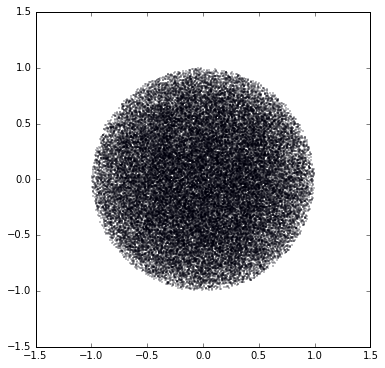

In [241]:
figure(figsize=(6, 6))
phi = random.rand(50000) * 2*pi
theta = random.rand(50000) * 2 - 1
R = random.rand(50000)
X = R**(1/3.0) * sin(phi) * sin(arccos(theta))
Y = R**(1/3.0) * cos(phi) * sin(arccos(theta))
Z = R**(1/3.0) * cos(arccos(theta))
scatter(Y, Z, s=0.1)

In [242]:
I_test = RIT(X, Y, Z, 1, 1)
print I_test

[[ 16568.11175528     28.89768616     36.29534914]
 [    28.89768616  16705.7169246     -16.76485858]
 [    36.29534914    -16.76485858  16726.17132012]]


In [243]:
def shape(X, Y, Z, tol):
    q = 1.0
    s = 1.0 
    I_test = RIT(X, Y, Z, q, s)
    
    Ixy = I_test[0][1]
    Ixz = I_test[0][2]
    Iyx = I_test[1][0]
    Iyz = I_test[1][2]
    Izx = I_test[2][0]
    Izy = I_test[2][1]
    print Ixy, Ixz, Iyx, Iyz, Izx, Izy
    
    while((abs(Ixy)>tol) | (abs(Ixz)>tol) | (abs(Iyx)>tol) | (abs(Iyz)>tol) | (abs(Izx)>tol) | (abs(Izy)>tol)):
        eival, evec = eig(I_test)
        oeival = sort(eival)
        #print oeival
        la = oeival[2]
        lb = oeival[1]
        lc = oeival[0]
        s = np.sqrt(lc/la)
        q = np.sqrt(lb/la)
        I_test = RIT(X, Y, Z, q, s)
        Ixy = I_test[0][1]
        Ixz = I_test[0][2]
        Iyx = I_test[1][0]
        Iyz = I_test[1][2]
        Izx = I_test[2][0]
        Izy = I_test[2][1]
        #print Ixy, Ixz, Iyx, Iyz, Izx, Izy
    return s, q


In [244]:
shape(X, Y, Z, 1.0)

KeyboardInterrupt: 

In [245]:
eival, evec = eig(I_test)
print eival
oival = sort(eival)
ax = oival[2]
ay = oival[1]
az = oival[0]
s = sqrt(az/ax)
q = sqrt(ay/ax)
#aa = max(eival)
#print ax, ay, az
#print 'eigen vectors'
print '--------------'
print evec
I_test = RIT(X, Y, Z, q, s)
print '-------------'
print I_test



[ 16553.50197571  16708.47734496  16738.02067933]
--------------
[[-0.95356462  0.26843073  0.13659966]
 [ 0.20530409  0.91114304 -0.35730742]
 [ 0.22037412  0.31267124  0.92394369]]
-------------
[[  1.65252063e+04   2.86889479e+01   3.59762371e+01]
 [  2.86889479e+01   1.66510212e+04  -1.65418571e+01]
 [  3.59762371e+01  -1.65418571e+01   1.66091913e+04]]


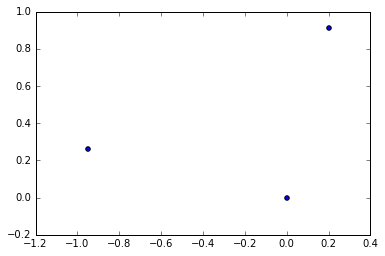

In [249]:
scatter(-0.95, 0.26)
scatter(0,0)
scatter(0.2,0.91111)

In [208]:
print ay/ax
print az/ax

0.65012810617
0.560148133128


In [119]:
I_test = RIT(X, Y, Z, q, s)
print I_test
eival, evec = eig(I_test)
print eival
ax = eival[2]
ay = eival[0]
az = eival[1]
s = sqrt(az/ax)
q = sqrt(ay/ax)

[[ 181.63826058   -4.47490201   -3.87295396]
 [  -4.47490201  130.86670303    3.55135393]
 [  -3.87295396    3.55135393  284.81104631]]
[ 181.86126126  130.40882998  285.04591868]


In [120]:
I_test = RIT(X, Y, Z, q, s)
print I_test
eival, evec = eig(I_test)
print '-----------------------------------------------'
print eival
print evec

[[ 186.1366783    -5.67971172   -3.72467961]
 [  -5.67971172  157.28569967    4.13774772]
 [  -3.72467961    4.13774772  259.55717043]]
-----------------------------------------------
[ 186.94553454  156.09734562  259.93666825]
[[ 0.98187686 -0.18176084 -0.05367342]
 [-0.17957059 -0.98279685  0.04318291]
 [ 0.06059903  0.03276213  0.99762438]]


In [ ]:
def rotation(x, y, z, ax, ay, az):
    
    

In [33]:
I_test = RIT(X-ax, Y-ay, Z-az, 0.5, 0.2)
print I_test

[[ 33.33179093  33.33450459  33.33142483]
 [ 33.33450459  33.33828425  33.3346872 ]
 [ 33.33142483  33.3346872   33.33260288]]


In [42]:
cube = zeros([3,3])

cube[0][0] = 2/3.0
cube[1][0] = -1/4.0
cube[2][0] = -1/4.0

cube[0][1] = -1/4.0
cube[1][1] = 2/3.0
cube[2][1] = -1/4.0

cube[0][2] = -1/4.0
cube[1][2] = -1/4.0
cube[2][2] = 2/3.0

print cube

[[ 0.66666667 -0.25       -0.25      ]
 [-0.25        0.66666667 -0.25      ]
 [-0.25       -0.25        0.66666667]]


In [48]:
eig(cube)

(array([ 0.91666667,  0.16666667,  0.91666667]),
 array([[ 0.81649658, -0.57735027,  0.43514263],
        [-0.40824829, -0.57735027, -0.81589244],
        [-0.40824829, -0.57735027,  0.38074981]]))

In [51]:
np.sqrt(0.91666667**2 + 0.16666667**2 + 0.91666667**2)

1.3070322668804573

In [ ]:
theta = arcos(0.81649658*)